# Deep Learning - Face Mask Detection

### PyTorch - Image Classification

In this project we'll see how deep learning can be used to identify whether a person (or image) is wearing a mask or not. This can be helpful for facial recognition software like unlocking mobile devices.

This project is based on the lessons from Jovian's Deep Learning with PyTorch: Zero to GANS course.


In [ ]:
# Uncomment and run the appropriate command for your operating system, if required

# Linux / Binder / Windows (No GPU)
# !pip install numpy matplotlib torch==1.7.0+cpu torchvision==0.8.1+cpu torchaudio==0.7.0 -f https://download.pytorch.org/whl/torch_stable.html

# Linux / Windows (GPU)
# pip install torch==1.7.1+cu110 torchvision==0.8.2+cu110 torchaudio==0.7.2 -f https://download.pytorch.org/whl/torch_stable.html
 
# MacOS (NO GPU)
# !pip install numpy matplotlib torch torchvision torchaudio

In [ ]:
import os
!pip install opendatasets --upgrade
import opendatasets as od
import torch
import torchvision
import tarfile
from torchvision.datasets.utils import download_url
from torch.utils.data import random_split

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
project_name='deep-learning-project'

## Kaggle Download

Here we'll download the dataset that will be used for the model.

In [ ]:
dataset_url = 'https://www.kaggle.com/datasets/ashishjangra27/face-mask-12k-images-dataset'
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: jonathanjono
Your Kaggle Key: ··········


100%|██████████| 330M/330M [00:01<00:00, 178MB/s]


The dataset contains `train`, `val`, and `test` sets. There are two classes, which are simply 'WithMask' and 'WithoutMask'.

In [ ]:
data_dir = './face-mask-12k-images-dataset'

print(os.listdir(data_dir))
folders = os.listdir(data_dir + "/Face Mask Dataset")
classes = os.listdir(data_dir + "/Face Mask Dataset/Train")
print(folders)
print(classes)

['Face Mask Dataset']
['Test', 'Train', 'Validation']
['WithMask', 'WithoutMask']


In [ ]:
train_folder = data_dir + '/Face Mask Dataset/Train'
val_folder = data_dir + '/Face Mask Dataset/Validation'
test_folder = data_dir + '/Face Mask Dataset/Test'

In [ ]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
import torchvision.transforms as T

Here we'll be normalizing the images to have the same shape.

In [ ]:
image_size = 64

transform_compose = T.Compose([
          T.Resize(image_size),
          T.CenterCrop(image_size),
          T.ToTensor(),   
])

In [ ]:
train_dataset = ImageFolder(train_folder, transform=transform_compose)
val_dataset = ImageFolder(val_folder, transform=transform_compose)

Let's look at a sample element from the training dataset. Each element is a tuple, containing a image tensor and a label. Since the data consists of 64x64 px color images with 3 channels (RGB), each image tensor has the shape `(3, 64, 64)`.

In [ ]:
img, label = train_dataset[0]
print(img.shape, label)
img

torch.Size([3, 64, 64]) 0


tensor([[[0.9373, 0.9373, 0.9412,  ..., 0.7922, 0.7922, 0.7961],
         [0.9333, 0.9412, 0.9451,  ..., 0.7686, 0.7686, 0.7804],
         [0.9373, 0.9373, 0.9412,  ..., 0.7373, 0.7647, 0.7725],
         ...,
         [0.9216, 0.9216, 0.9176,  ..., 0.5882, 0.5922, 0.5961],
         [0.9255, 0.9255, 0.9176,  ..., 0.5922, 0.5922, 0.5961],
         [0.9216, 0.9216, 0.9176,  ..., 0.5882, 0.5922, 0.5961]],

        [[0.9333, 0.9333, 0.9373,  ..., 0.7725, 0.7725, 0.7765],
         [0.9294, 0.9373, 0.9412,  ..., 0.7490, 0.7490, 0.7608],
         [0.9333, 0.9333, 0.9373,  ..., 0.7176, 0.7451, 0.7529],
         ...,
         [0.9216, 0.9216, 0.9176,  ..., 0.5922, 0.5961, 0.6000],
         [0.9255, 0.9255, 0.9176,  ..., 0.5961, 0.5961, 0.6000],
         [0.9216, 0.9216, 0.9176,  ..., 0.5922, 0.5961, 0.6000]],

        [[0.9255, 0.9255, 0.9294,  ..., 0.7490, 0.7490, 0.7529],
         [0.9216, 0.9294, 0.9333,  ..., 0.7255, 0.7255, 0.7373],
         [0.9255, 0.9255, 0.9294,  ..., 0.6941, 0.7216, 0.

In [ ]:
img, label = train_dataset[1]
print(img.shape, label)
img

torch.Size([3, 64, 64]) 0


tensor([[[0.2706, 0.2588, 0.2157,  ..., 0.4000, 0.4588, 0.4706],
         [0.2667, 0.2588, 0.2196,  ..., 0.3922, 0.4510, 0.4627],
         [0.2588, 0.2510, 0.2275,  ..., 0.3569, 0.4078, 0.4157],
         ...,
         [0.3961, 0.3922, 0.3804,  ..., 0.1294, 0.1490, 0.1529],
         [0.3765, 0.3725, 0.3647,  ..., 0.1529, 0.1686, 0.1725],
         [0.3725, 0.3686, 0.3608,  ..., 0.1569, 0.1725, 0.1765]],

        [[0.2549, 0.2431, 0.2000,  ..., 0.3961, 0.4549, 0.4667],
         [0.2510, 0.2392, 0.2000,  ..., 0.3882, 0.4471, 0.4588],
         [0.2392, 0.2314, 0.2078,  ..., 0.3569, 0.4039, 0.4118],
         ...,
         [0.4157, 0.4118, 0.3922,  ..., 0.1529, 0.1804, 0.1882],
         [0.3961, 0.3922, 0.3765,  ..., 0.1725, 0.2000, 0.2078],
         [0.3922, 0.3882, 0.3725,  ..., 0.1765, 0.2039, 0.2118]],

        [[0.2510, 0.2431, 0.2000,  ..., 0.3882, 0.4471, 0.4588],
         [0.2471, 0.2392, 0.2000,  ..., 0.3804, 0.4392, 0.4510],
         [0.2353, 0.2314, 0.2078,  ..., 0.3490, 0.3961, 0.

We can view the image using `matplotlib`, but we need to change the tensor dimensions to `(64,64,3)`. Let's create a helper function to display an image and its label.

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.rcParams['figure.facecolor'] = '#ffffff'

In [ ]:

def show_example(img, label):
    print('Label: ', classes[label], "("+str(label)+")")
    plt.imshow(img.permute(1, 2, 0))

Let's look at a couple of images from the dataset. As you can tell, the 32x32px images are quite difficult to identify, even for the human eye. Try changing the indices below to view different images.

Label:  WithMask (0)


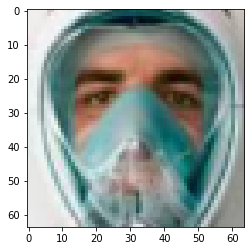

In [ ]:
show_example(*train_dataset[0])

Label:  WithoutMask (1)


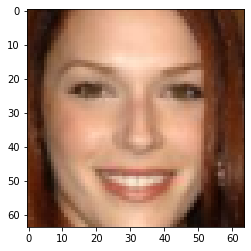

In [ ]:
show_example(*train_dataset[5002])

## Save Notebook

Committing and saving work here to the Jovian platform.

In [ ]:
!pip install jovian --upgrade -q

     |████████████████████████████████| 68 kB 3.5 MB/s 


In [ ]:
import jovian

In [ ]:
jovian.commit(project="deep-learning-project")

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/jonathan-k-lee9/deep-learning-project


'https://jovian.ai/jonathan-k-lee9/deep-learning-project'

## Data Loaders

We already have 3 sets for training, validation, and testing, so we will not be splitting the data.

We can now create data loaders for training and validation, to load the data in batches.

In [ ]:
from torch.utils.data.dataloader import DataLoader

batch_size=128

In [ ]:
# keep num_workers=1
train_dl = DataLoader(train_dataset, batch_size, shuffle=True, num_workers=1, pin_memory=True)
val_dl = DataLoader(val_dataset, batch_size*2, num_workers=1, pin_memory=True)

We can look at batches of images from the dataset using the `make_grid` method from `torchvision`. Each time the following code is run, we get a different batch, since the sampler shuffles the indices before creating batches.

In [ ]:
from torchvision.utils import make_grid

def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
        break

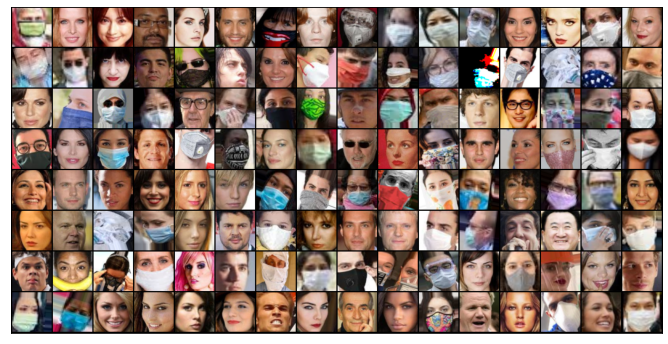

In [ ]:
show_batch(train_dl)

## Defining the Model (Convolutional Neural Network)

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))
        
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

We will use a convolutional neural network, using the `nn.Conv2d` class from PyTorch. We'll also use `nn.Sequential` to chain the layers and activations functions into a single network architecture.

In [ ]:
class MaskCnnModel(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 64 x 16 x 16

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 128 x 8 x 8

            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 256 x 4 x 4

            nn.Flatten(), 
            # nn.Linear(256*4*4, 1024),
            nn.Linear(16384, 1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, 2))
        
    def forward(self, xb):
        return self.network(xb)

In [ ]:
model = MaskCnnModel()
model

MaskCnnModel(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Flatten(start_dim=1, end_dim=-1)
    (16): Linear(in_features=16384, out_features=1024, bias=True)
    (17): ReLU()
    (18): Linear(in_featur

Let's verify that the model produces the expected output on a batch of training data. The outputs for each image can be interpreted as probabilities for the target classes (after applying softmax), and the class with the highest probability is chosen as the label predicted by the model for the input image.

In [ ]:
for images, labels in train_dl:
    print('images.shape:', images.shape)
    out = model(images)
    print('out.shape:', out.shape)
    print('out[0]:', out[0])
    break

images.shape: torch.Size([128, 3, 64, 64])
out.shape: torch.Size([128, 2])
out[0]: tensor([ 0.0463, -0.0065], device='cuda:0', grad_fn=<SelectBackward0>)


## Using a GPU

To seamlessly use a GPU, if one is available, we define a couple of helper functions (`get_default_device` & `to_device`) and a helper class `DeviceDataLoader` to move our model & data to the GPU as required.

In [ ]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

Based on where you're running this notebook, your default device could be a CPU (`torch.device('cpu')`) or a GPU (`torch.device('cuda')`)

In [ ]:
device = get_default_device()
device

device(type='cuda')

We can now wrap our training and validation data loaders using `DeviceDataLoader` for automatically transferring batches of data to the GPU (if available), and use `to_device` to move our model to the GPU (if available).

In [ ]:
train_dl = DeviceDataLoader(train_dl, device)
val_dl = DeviceDataLoader(val_dl, device)
to_device(model, device);

In [ ]:
jovian.commit(project=project_name)

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/jonathan-k-lee9/deep-learning-project


'https://jovian.ai/jonathan-k-lee9/deep-learning-project'

## Training the Model

We'll define two functions: `fit` and `evaluate` to train the model using gradient descent and evaluate its performance on the validation set.

In [ ]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

Before we begin training, let's instantiate the model once again and see how it performs on the validation set with the initial set of parameters.

In [ ]:
model = to_device(MaskCnnModel(), device)

In [ ]:
evaluate(model, val_dl)

{'val_acc': 0.390625, 'val_loss': 0.6935366988182068}

The initial accuracy is around 39%, which is what one might expect from a randomly intialized model.

We'll use the following *hyperparameters* (learning rate, no. of epochs, batch_size etc.) to train our model.

In [ ]:
num_epochs = 10
opt_func = torch.optim.Adam
lr = 0.001

It's important to record the hyperparameters of every experiment you do, to replicate it later and compare it against other experiments. We can record them using `jovian.log_hyperparams`.

In [ ]:
jovian.reset()
jovian.log_hyperparams({
    'num_epochs': num_epochs,
    'opt_func': opt_func.__name__,
    'batch_size': batch_size,
    'lr': lr,
})

[jovian] Hyperparams logged.


In [ ]:
history = fit(num_epochs, lr, model, train_dl, val_dl, opt_func)

Epoch [0], train_loss: 0.3391, val_loss: 0.1577, val_acc: 0.9453
Epoch [1], train_loss: 0.1170, val_loss: 0.1820, val_acc: 0.9336
Epoch [2], train_loss: 0.1062, val_loss: 0.2309, val_acc: 0.9014
Epoch [3], train_loss: 0.0922, val_loss: 0.0829, val_acc: 0.9707
Epoch [4], train_loss: 0.0648, val_loss: 0.0410, val_acc: 0.9834
Epoch [5], train_loss: 0.0430, val_loss: 0.0528, val_acc: 0.9766
Epoch [6], train_loss: 0.0276, val_loss: 0.0320, val_acc: 0.9912
Epoch [7], train_loss: 0.0273, val_loss: 0.0100, val_acc: 0.9951
Epoch [8], train_loss: 0.0200, val_loss: 0.0150, val_acc: 0.9961
Epoch [9], train_loss: 0.0103, val_loss: 0.0160, val_acc: 0.9971


Just as we have recorded the hyperparameters, we can also record the final metrics achieved by the model using `jovian.log_metrics` for reference, analysis and comparison.

In [ ]:
jovian.log_metrics(train_loss=history[-1]['train_loss'], 
                   val_loss=history[-1]['val_loss'], 
                   val_acc=history[-1]['val_acc'])

[jovian] Metrics logged.


We can also plot the valdation set accuracies to study how the model improves over time.

In [ ]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

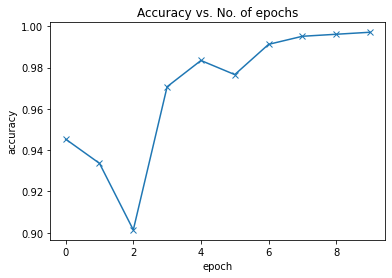

In [ ]:
plot_accuracies(history)

Our model reaches an accuracy of around 99%, which is understandable considering how there are only 2 options to pick from. Strangely, the level of accuracy drops randomly at 2 epoch.

We can also plot the training and validation losses to study the trend.

In [ ]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

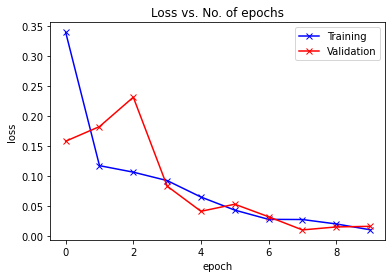

In [ ]:
plot_losses(history)

In [ ]:
jovian.commit(project=project_name)

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Attaching records (metrics, hyperparameters, dataset etc.)
Committed successfully! https://jovian.ai/jonathan-k-lee9/deep-learning-project


'https://jovian.ai/jonathan-k-lee9/deep-learning-project'

## Testing with individual images

While we have been tracking the overall accuracy of a model so far, it's also a good idea to look at model's results on some sample images. Let's test out our model with some images from the predefined test dataset.



In [ ]:
test_dataset = ImageFolder(test_folder, transform=transform_compose)

Let's define a helper function `predict_image`, which returns the predicted label for a single image tensor.

In [ ]:
def predict_image(img, model):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return classes[preds[0].item()]

Label: WithMask , Predicted: WithMask


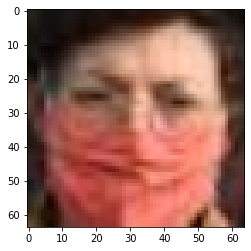

In [ ]:
img, label = test_dataset[0]
plt.imshow(img.permute(1, 2, 0))
print('Label:', classes[label], ', Predicted:', predict_image(img, model))

Label: WithMask , Predicted: WithMask


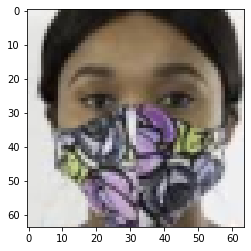

In [ ]:
img, label = test_dataset[10]
plt.imshow(img.permute(1, 2, 0))
print('Label:', classes[label], ', Predicted:', predict_image(img, model))

Label: WithoutMask , Predicted: WithoutMask


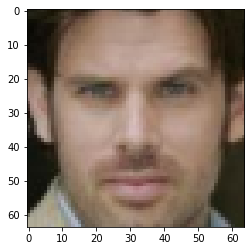

In [ ]:
img, label = test_dataset[500]
plt.imshow(img.permute(1, 2, 0))
print('Label:', classes[label], ', Predicted:', predict_image(img, model))

Identifying where our model performs poorly can help us improve the model, by collecting more training data, increasing/decreasing the complexity of the model, and changing the hypeparameters.

As a final step, let's also look at the overall loss and accuracy of the model on the test set, and record using `jovian`. We expect these values to be similar to those for the validation set. If not, we might need a better validation set that has similar data and distribution as the test set (which often comes from real world data).

In [ ]:
test_dl = DataLoader(test_dataset, batch_size*2, num_workers=1, pin_memory=True)
test_dl = DeviceDataLoader(test_dl, device)

result = evaluate(model, test_dl)
result

{'val_acc': 0.9907923936843872, 'val_loss': 0.040348391979932785}

In [ ]:
jovian.log_metrics(test_loss=result['val_loss'], test_acc=result['val_acc'])

[jovian] Metrics logged.


## Saving and loading the model

Since we've trained our model for a long time and achieved a resonable accuracy, it would be a good idea to save the weights of the model to disk, so that we can reuse the model later and avoid retraining from scratch. Here's how you can save the model.

In [ ]:
torch.save(model.state_dict(), 'face-mask-12k-images-dataset.pth')

The `.state_dict` method returns an `OrderedDict` containing all the weights and bias matrices mapped to the right attributes of the model. To load the model weights, we can redefine the model with the same structure, and use the `.load_state_dict` method.

In [ ]:
model2 = to_device(MaskCnnModel(), device)

In [ ]:
model2.load_state_dict(torch.load('face-mask-12k-images-dataset.pth'))

<All keys matched successfully>

Just as a sanity check, let's verify that this model has the same loss and accuracy on the test set as before.

In [ ]:
evaluate(model2, test_dl)

{'val_acc': 0.9907923936843872, 'val_loss': 0.040348391979932785}

Let's make one final commit using `jovian`.

In [ ]:
jovian.commit(project=project_name)

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Attaching records (metrics, hyperparameters, dataset etc.)
Committed successfully! https://jovian.ai/jonathan-k-lee9/deep-learning-project


'https://jovian.ai/jonathan-k-lee9/deep-learning-project'

## Summary

The CNN model trained here reached an accuracy of 99% on the test set, which is pretty good. Although, this may simply due to the low number of classes in this dataset. Using deep learning for detecting face masks would be helpful for devices like phones that unlock with facial recognition. More deep learning models and techniques, and hyperparameter optimizing can always be explored.

## References

https://jovian.ai/learn/deep-learning-with-pytorch-zero-to-gans